In [210]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [211]:
data = pd.read_csv('/content/netflix1 (1).csv')

In [212]:
print(data.head())

  show_id     type                             title         director  \
0      s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1      s3  TV Show                         Ganglands  Julien Leclercq   
2      s6  TV Show                     Midnight Mass    Mike Flanagan   
3     s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
4      s8    Movie                           Sankofa     Haile Gerima   

         country date_added  release_year rating  duration  \
0  United States  9/25/2021          2020  PG-13    90 min   
1         France  9/24/2021          2021  TV-MA  1 Season   
2  United States  9/24/2021          2021  TV-MA  1 Season   
3         Brazil  9/22/2021          2021  TV-PG    91 min   
4  United States  9/24/2021          1993  TV-MA   125 min   

                                           listed_in  
0                                      Documentaries  
1  Crime TV Shows, International TV Shows, TV Act...  
2                 TV Dr

In [213]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [214]:
data.shape

(8790, 10)

In [215]:
print(data.isnull().sum())

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64


In [216]:
data.drop_duplicates(inplace=True)

In [217]:
data.dropna(subset=['director', 'country'] ,inplace=True)

In [218]:
data['date_added'] = pd.to_datetime(data['date_added'])

In [219]:
type_counts = data['type'].value_counts()
type_counts

,count
type,
Movie,6126
TV Show,2664


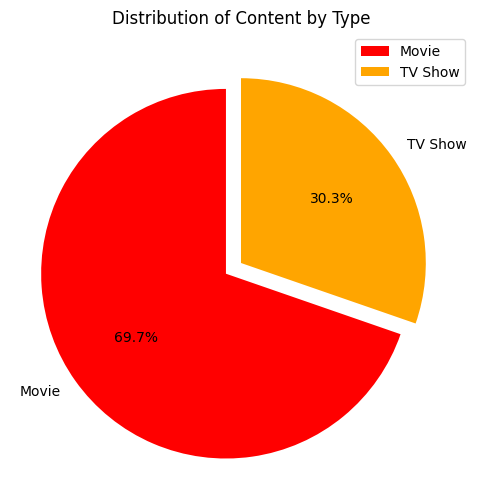

In [220]:
labels = type_counts.index
sizes = type_counts.values
colors = ['red', 'orange']
explode = [0.1, 0]

plt.figure(figsize=(8, 6))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    explode=explode
)

plt.title('Distribution of Content by Type')
plt.legend()
plt.show()

In [221]:
country_counts=data['country'].value_counts().head(10)
country_counts

,count
country,
United States,3240
India,1057
United Kingdom,638
Pakistan,421
Not Given,287
Canada,271
Japan,259
South Korea,214
France,213


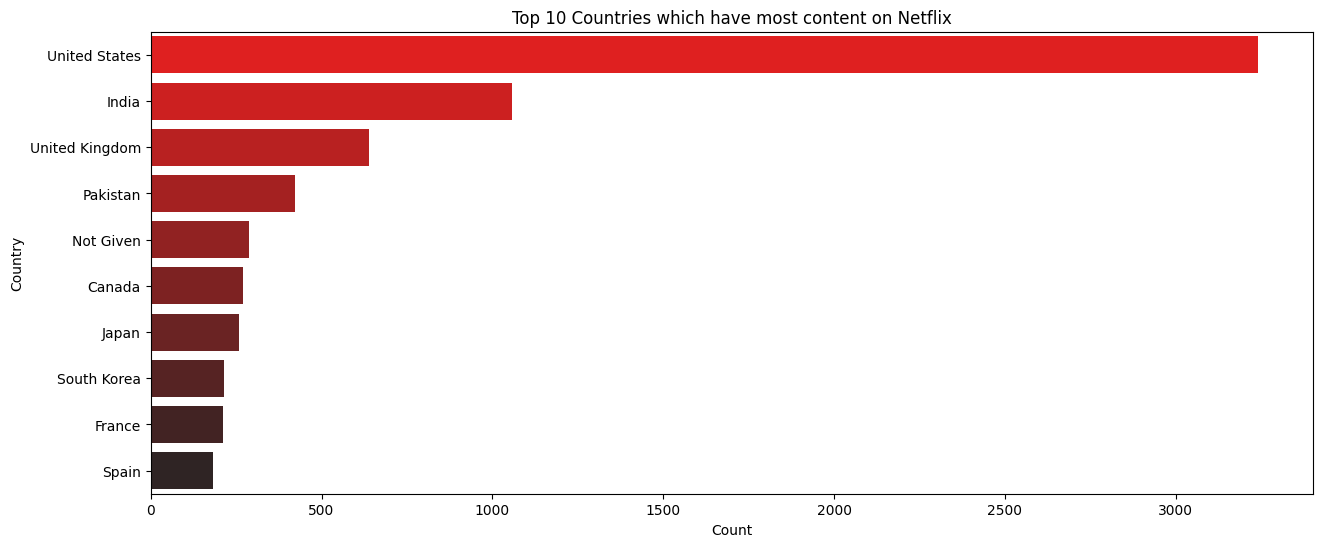

In [222]:
plt.figure(figsize=(15,6))
sns.barplot(x=country_counts,y=country_counts.index,hue=country_counts.index,palette=sns.dark_palette("red", n_colors=len(country_counts), reverse=True))
plt.title('Top 10 Countries which have most content on Netflix')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

In [223]:
types_per_year=data.groupby('release_year').size()
types_per_year

,0
release_year,
1925,1
1942,2
1943,3
1944,3
1945,4
...,...
2017,1030
2018,1146
2019,1030


In [224]:
top10_release_per_year= types_per_year.sort_values(ascending=False).head(10)
top10_release_per_year

,0
release_year,
2018,1146
2019,1030
2017,1030
2020,953
2016,901
2021,592
2015,555
2014,352
2013,286


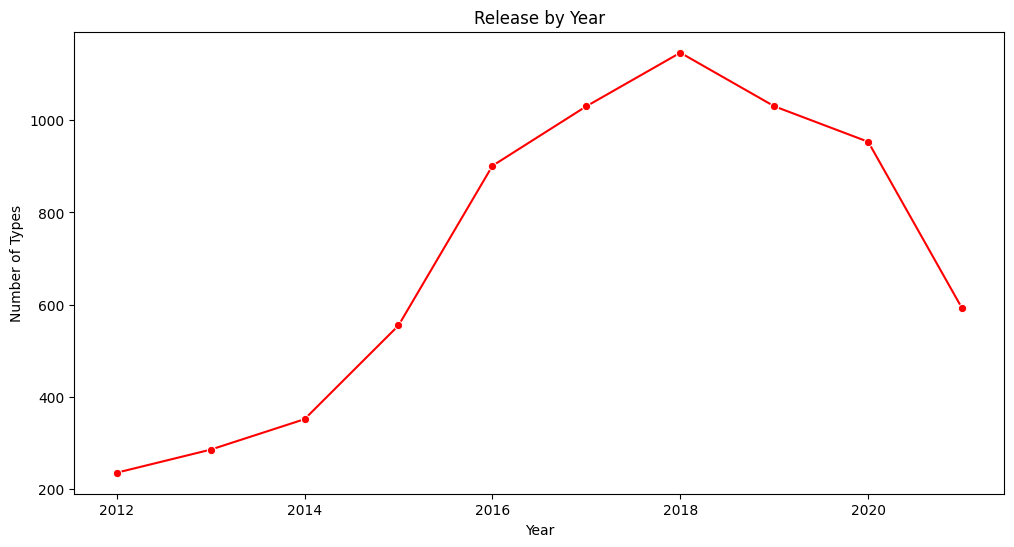

In [225]:
plt.figure(figsize=(12,6))
sns.lineplot(x=top10_release_per_year.index,y=top10_release_per_year.values,marker='o',color='red')
plt.title('Release by Year')
plt.xlabel('Year')
plt.ylabel('Number of Types')
plt.show()


In [226]:
data['monthly_release'] = data['date_added'].dt.month
release_per_month= data['monthly_release'].value_counts().sort_index()
release_per_month

,count
monthly_release,
1,737
2,562
3,741
4,763
5,632
6,728
7,827
8,754
9,769


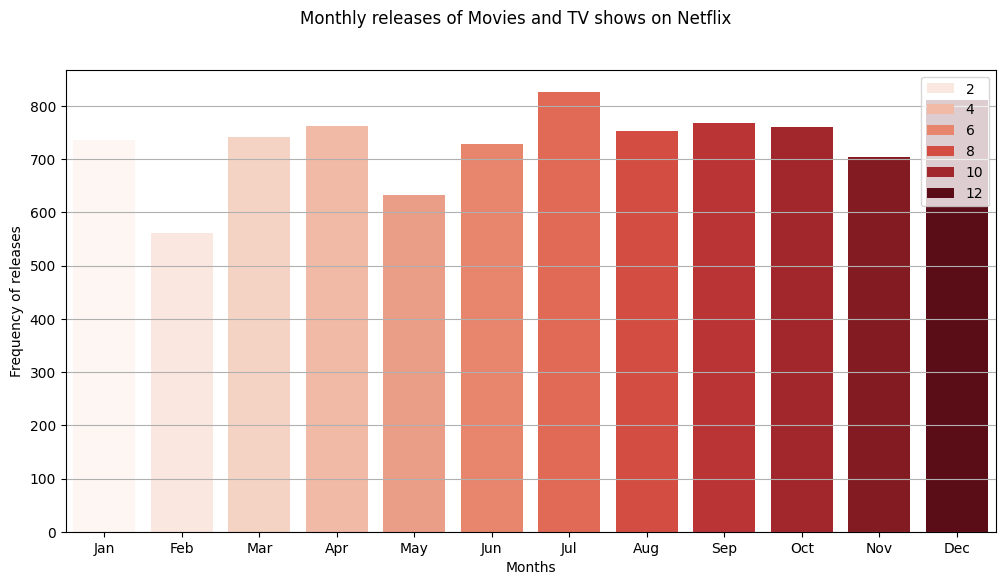

In [227]:
plt.figure(figsize=(12,6))
sns.barplot(x=release_per_month.index,y=release_per_month.values,hue=release_per_month.index,palette='Reds')
plt.xlabel("Months")
plt.ylabel("Frequency of releases")
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(axis='y')
plt.suptitle("Monthly releases of Movies and TV shows on Netflix")
plt.show()

In [228]:
popular_movie_genre=data[data['type']=='Movie'].groupby('listed_in').size().sort_values(ascending=False)[:10]
popular_movie_genre


,0
listed_in,
"Dramas, International Movies",362
Documentaries,359
Stand-Up Comedy,334
"Comedies, Dramas, International Movies",274
"Dramas, Independent Movies, International Movies",252
Children & Family Movies,215
"Children & Family Movies, Comedies",201
"Documentaries, International Movies",186
"Dramas, International Movies, Romantic Movies",180


In [229]:
popular_tvshow_genre=data[data['type']=='TV Show'].groupby('listed_in').size().sort_values(ascending=False)[:10]
popular_tvshow_genre

,0
listed_in,
Kids' TV,219
"International TV Shows, TV Dramas",121
"Crime TV Shows, International TV Shows, TV Dramas",110
"Kids' TV, TV Comedies",97
Reality TV,95
"International TV Shows, Romantic TV Shows, TV Comedies",94
"International TV Shows, Romantic TV Shows, TV Dramas",90
"Anime Series, International TV Shows",87
Docuseries,84


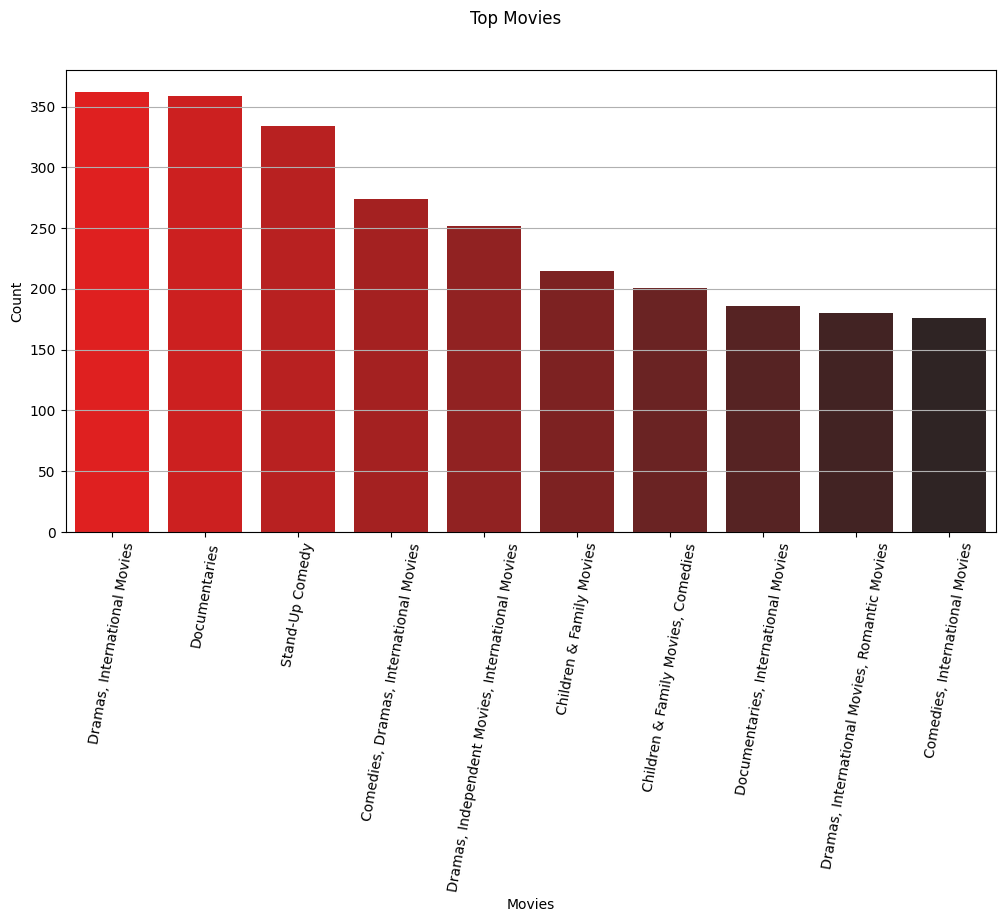

In [230]:
plt.figure(figsize=(12,6))
sns.barplot(x=popular_movie_genre.index,y=popular_movie_genre.values,hue=popular_movie_genre.index,palette=sns.dark_palette("red", n_colors=len(country_counts), reverse=True))
plt.xlabel('Movies')
plt.ylabel('Count')
plt.xticks(rotation=80)
plt.suptitle('Top Movies')
plt.grid(axis='y')
plt.show()

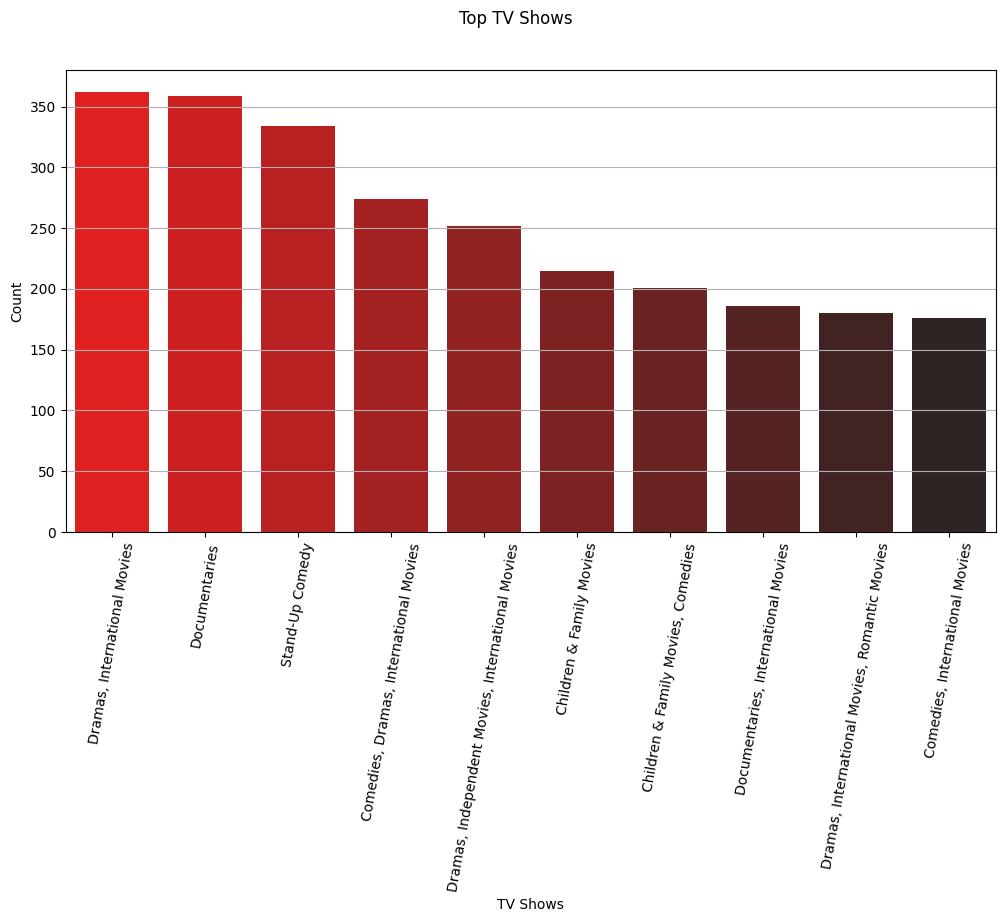

In [231]:
plt.figure(figsize=(12,6))
sns.barplot(x=popular_movie_genre.index,y=popular_movie_genre.values,hue=popular_movie_genre.index,palette=sns.dark_palette("red", n_colors=len(country_counts), reverse=True))
plt.xlabel('TV Shows')
plt.ylabel('Count')
plt.xticks(rotation=80)
plt.suptitle('Top TV Shows')
plt.grid(axis='y')
plt.show()

In [232]:
data['director'].value_counts().head(10)

,count
director,
Not Given,2588
Rajiv Chilaka,20
Alastair Fothergill,18
"Raúl Campos, Jan Suter",18
Suhas Kadav,16
Marcus Raboy,16
Jay Karas,14
Cathy Garcia-Molina,13
Martin Scorsese,12


In [233]:
data['director'].value_counts().head()

,count
director,
Not Given,2588
Rajiv Chilaka,20
Alastair Fothergill,18
"Raúl Campos, Jan Suter",18
Suhas Kadav,16


In [234]:
all_directors=data['director'].value_counts().sum()
all_directors

8790

In [235]:
not_given_directors=data['director'].value_counts().get('Not Given', 0)
not_given_directors

2588

In [236]:
given_directors=all_directors-not_given_directors
given_directors

6202

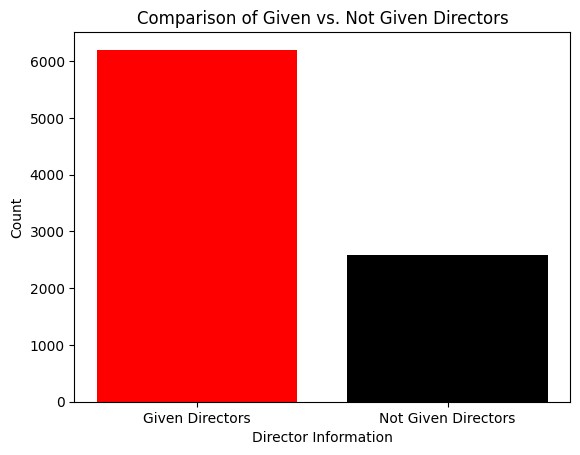

In [237]:
categories = ['Given Directors', 'Not Given Directors']
values = [given_directors, not_given_directors]
plt.bar(categories, values, color=['red','k'])
plt.xlabel("Director Information")
plt.ylabel("Count")
plt.title("Comparison of Given vs. Not Given Directors")
plt.show()

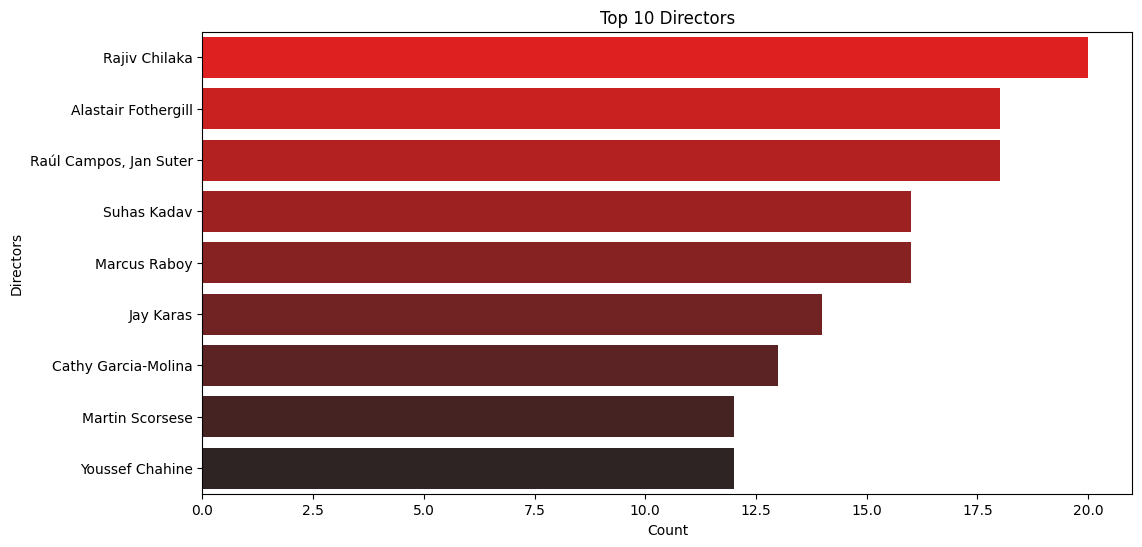

In [238]:
top_directors=data['director'].value_counts()[1:10]
plt.figure(figsize=(12,6))
sns.barplot(y=top_directors.index, x=top_directors.values,hue=top_directors.index,palette=sns.dark_palette("red", n_colors=len(top_directors), reverse=True))
plt.title('Top 10 Directors')
plt.xlabel('Count')
plt.ylabel('Directors')
plt.show()

In [239]:
data['rating'].value_counts()

,count
rating,
TV-MA,3205
TV-14,2157
TV-PG,861
R,799
PG-13,490
TV-Y7,333
TV-Y,306
PG,287
TV-G,220


In [249]:
ratings=data['rating'].value_counts()
ratings

,count
rating,
TV-MA,3205
TV-14,2157
TV-PG,861
R,799
PG-13,490
TV-Y7,333
TV-Y,306
PG,287
TV-G,220


Text(0.5, 0.98, 'Rating on Netflix')

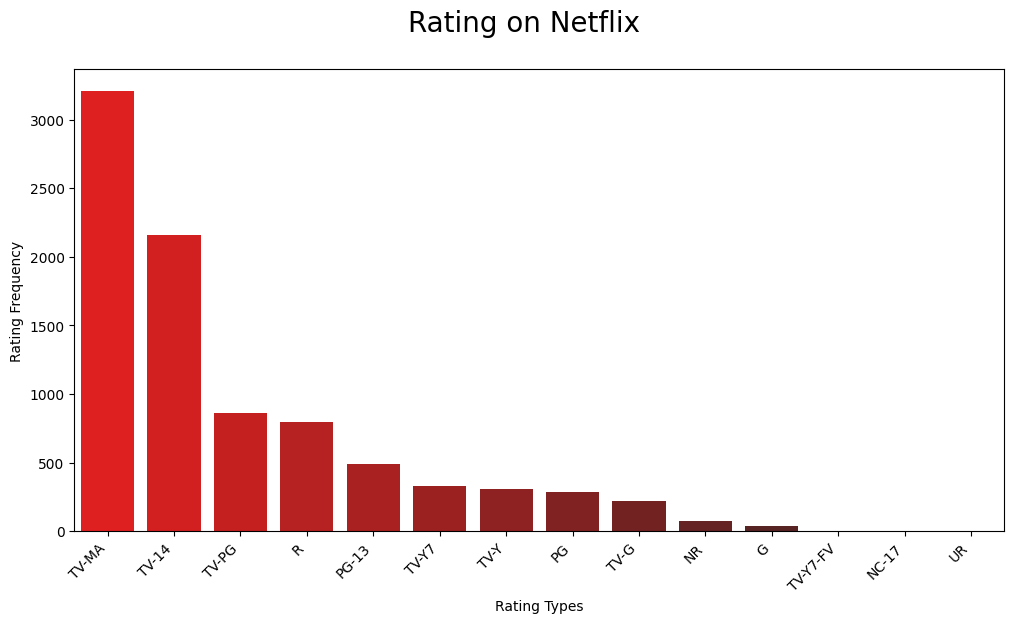

In [250]:
plt.figure(figsize=(12,6))
sns.barplot(x=ratings.index, y=ratings.values,hue=ratings.index,palette=sns.dark_palette("red", n_colors=len(ratings), reverse=True))
plt.xticks(rotation=45, ha='right')
plt.xlabel("Rating Types")
plt.ylabel("Rating Frequency")
plt.suptitle('Rating on Netflix', fontsize=20)